## Install Dependencies

In [1]:
%pip install matplotlib

import numpy as np
from matplotlib import pyplot as plt
from statistics import mean


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
def printb(text: str) -> None:
    print("\033[1m" + text + "\033[0m")

## Load result data

In [3]:
import json 

with open("experiment_results.json", "r") as results_file:
    experiments = json.load(results_file)

In [4]:
available_tags = set([
    experiment["params"]["tag"] for experiment in experiments
])
print("available tags:", available_tags)

available tags: {'reordering_varying_redundancy', 'varying_qubits', 'varying_gates', 'reordering_varying_steps', 'varying_redundancy'}


In [5]:
# plot simulation time of each seed

seeds = [experiment["params"]["seed"] for experiment in experiments]
seeds = list(set(seeds))

print(seeds)

[0, 1, 2, 3, 4]


## RQ1: How does the degree of redundancy within a population influence the behavior of the proposed simulation approach?

In [6]:
# Filter out and format experiment results with the varying_redundancy tag

vr_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "varying_redundancy"]
print(f"Total amount of varying_redundancy experiments: {len(vr_experiments)}")

Total amount of varying_redundancy experiments: 80


In [7]:
redundancies = [experiment["params"]["redundancy"] for experiment in vr_experiments]
redundancies = list(set(redundancies))
redundancies.sort()

print("Redundancies:", redundancies)

Redundancies: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


Total simulation time, averaged across seeds:


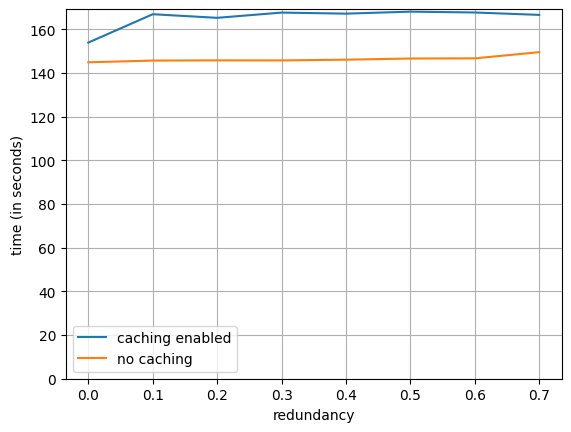

In [8]:
# Create a line chart with simulation time on y and redundancy level
# on x. One line for the runs with caching enabled, one line for the
# runs with cache size 0.

durations_no_cache = []
durations_with_cache = []

for redundancy in redundancies:

    sel_durations_no_cache = [
        experiment["total_duration"]
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] == 0
        and experiment["params"]["redundancy"] == redundancy
    ]
    durations_no_cache.append(mean(sel_durations_no_cache))

    sel_durations_with_cache = [
        experiment["total_duration"]
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["redundancy"] == redundancy
    ]
    durations_with_cache.append(mean(sel_durations_with_cache))


ax = plt.subplot()
ax.plot(redundancies, durations_with_cache)
ax.plot(redundancies, durations_no_cache)
ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Total simulation time, averaged across seeds:")

plt.legend(["caching enabled", "no caching"])
plt.grid()
plt.show()

Net simulation time, averaged across seeds:


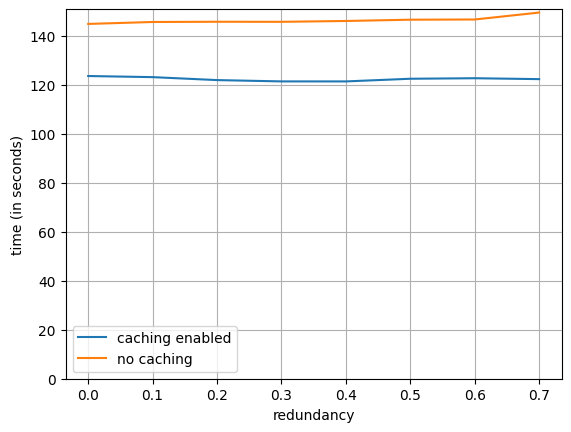

In [9]:
# Create a line chart with net simulation time on y and redundancy level
# on x. One line for the runs with caching enabled, one line for the
# runs with cache size 0.

durations_no_cache = []
durations_with_cache = []

for redundancy in redundancies:

    sel_durations_no_cache = [
        experiment["simulate_without_cache"]["duration"]
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] == 0
        and experiment["params"]["redundancy"] == redundancy
    ]
    durations_no_cache.append(mean(sel_durations_no_cache))

    sel_durations_with_cache = [
        experiment["simulate_using_cache"]["duration"]
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["redundancy"] == redundancy
    ]
    durations_with_cache.append(mean(sel_durations_with_cache))


ax = plt.subplot()
ax.plot(redundancies, durations_with_cache)
ax.plot(redundancies, durations_no_cache)
ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Net simulation time, averaged across seeds:")

plt.legend(["caching enabled", "no caching"])
plt.grid()
plt.show()

Total simulation time with caching disabled:


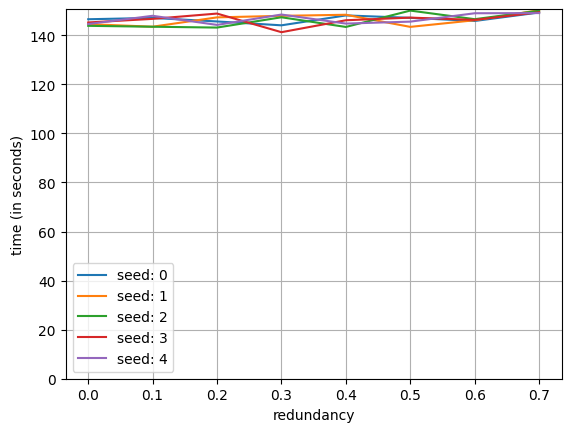

In [10]:
# plot simulation time of each seed without cache

ax = plt.subplot()

for seed in seeds:
    seed_durations_no_cache = []

    for redundancy in redundancies:

        sel_durations_no_cache = [
            experiment["total_duration"]
            for experiment in vr_experiments
            if experiment["params"]["cache_size"] == 0
            and experiment["params"]["seed"] == seed
            and experiment["params"]["redundancy"] == redundancy
        ]

        assert len(sel_durations_no_cache) == 1, "Too many results for one seed value!"

        seed_durations_no_cache.append(sel_durations_no_cache[0])

    ax.plot(redundancies, seed_durations_no_cache)

ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)


printb("Total simulation time with caching disabled:")
plt.legend([f"seed: {seed}" for seed in seeds])
plt.grid()
plt.show()

Total simulation time with caching enabled:


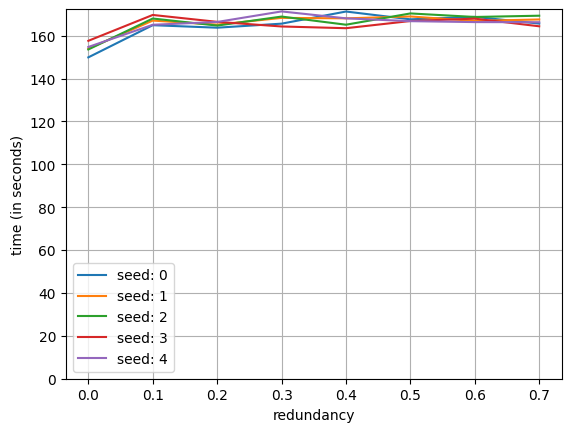

In [11]:
# plot simulation time of each seed with cache

ax = plt.subplot()

for seed in seeds:
    seed_durations_with_cache = []

    for redundancy in redundancies:

        sel_durations_with_cache = [
            experiment["total_duration"]
            for experiment in vr_experiments
            if experiment["params"]["cache_size"] > 0
            and experiment["params"]["seed"] == seed
            and experiment["params"]["redundancy"] == redundancy
        ]

        assert len(sel_durations_no_cache) == 1, "Too many results for one seed value!"

        seed_durations_with_cache.append(sel_durations_with_cache[0])

    ax.plot(redundancies, seed_durations_with_cache)

ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Total simulation time with caching enabled:")
plt.legend([f"seed: {seed}" for seed in seeds])
plt.grid()
plt.show()

Cache buildup and net simulation time, averaged across seeds:


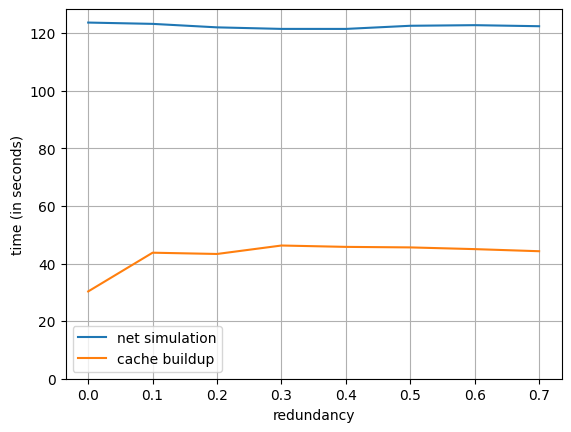

In [12]:
# Create a line chart with simulation vs. preparation time of 
# caching enabled.
simulation_durations = []
overhead_durations = []

for redundancy in redundancies:

    relevant_experiments = [
        experiment
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["redundancy"] == redundancy
    ]

    sel_simulation_durations = [
        experiment["simulate_using_cache"]["duration"]
        for experiment in relevant_experiments
    ]
    sel_overhead_durations = [
        experiment["total_duration"] - experiment["simulate_using_cache"]["duration"]
        for experiment in relevant_experiments
    ]

    simulation_durations.append(mean(sel_simulation_durations))
    overhead_durations.append(mean(sel_overhead_durations))


ax = plt.subplot()
ax.plot(redundancies, simulation_durations)
ax.plot(redundancies, overhead_durations)
ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Cache buildup and net simulation time, averaged across seeds:")
plt.legend(["net simulation", "cache buildup"])
plt.grid()
plt.show()

Net simulation time with caching enabled:


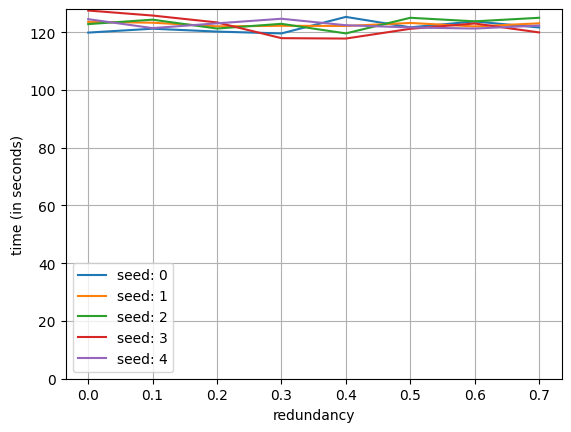

In [13]:
# Create a line chart with simulation time per seed

ax = plt.subplot()

for seed in seeds:
    seed_simulation_durations = []

    for redundancy in redundancies:
        relevant_experiments = [
            experiment
            for experiment in vr_experiments
            if experiment["params"]["cache_size"] > 0
            and experiment["params"]["seed"] == seed
            and experiment["params"]["redundancy"] == redundancy
        ]

        sel_simulation_durations = [
            experiment["simulate_using_cache"]["duration"]
            for experiment in relevant_experiments
        ]

        assert len(sel_simulation_durations) == 1, "Too many results per seed"

        seed_simulation_durations.append(sel_simulation_durations[0])

    ax.plot(redundancies, seed_simulation_durations)

ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Net simulation time with caching enabled:")
plt.legend([f"seed: {seed}" for seed in seeds])
plt.grid()
plt.show()

Cache buildup time when caching enabled:


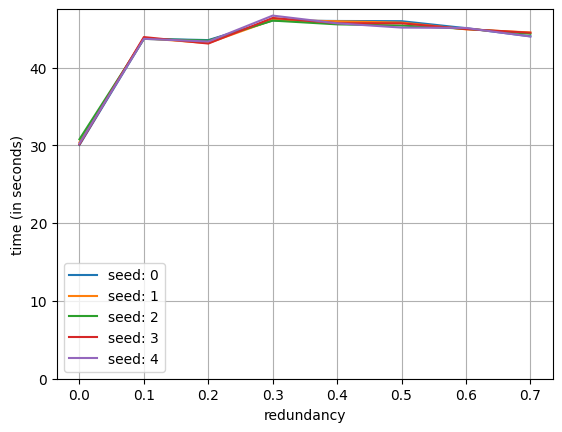

In [14]:
# Create a line chart with cache build time per seed

ax = plt.subplot()

for seed in seeds:
    seed_overhead_durations = []

    for redundancy in redundancies:
        relevant_experiments = [
            experiment
            for experiment in vr_experiments
            if experiment["params"]["cache_size"] > 0
            and experiment["params"]["seed"] == seed
            and experiment["params"]["redundancy"] == redundancy
        ]

        sel_overhead_durations = [
            experiment["total_duration"]
            - experiment["simulate_using_cache"]["duration"]
            for experiment in relevant_experiments
        ]

        assert len(sel_overhead_durations) == 1, "Too many results per seed"

        seed_overhead_durations.append(sel_overhead_durations[0])

    ax.plot(redundancies, seed_overhead_durations)

ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Cache buildup time when caching enabled:")
plt.legend([f"seed: {seed}" for seed in seeds])
plt.grid()
plt.show()

Trie lookup duration, averaged across seeds:


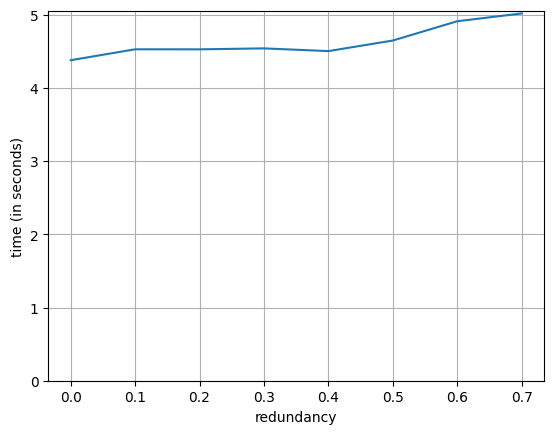

In [15]:
# Plot trie lookup durations averaged across seeds

trie_lookup_durations = []

for redundancy in redundancies:

    relevant_experiments = [
        experiment
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["redundancy"] == redundancy
    ]

    sel_trie_lookup_durations = [
        experiment["simulate_using_cache"]["trie_lookup_duration"]
        for experiment in relevant_experiments
    ]

    trie_lookup_durations.append(mean(sel_trie_lookup_durations))


ax = plt.subplot()
ax.plot(redundancies, trie_lookup_durations)

ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Trie lookup duration, averaged across seeds:")
plt.grid()
plt.show()

Trie lookup duration:


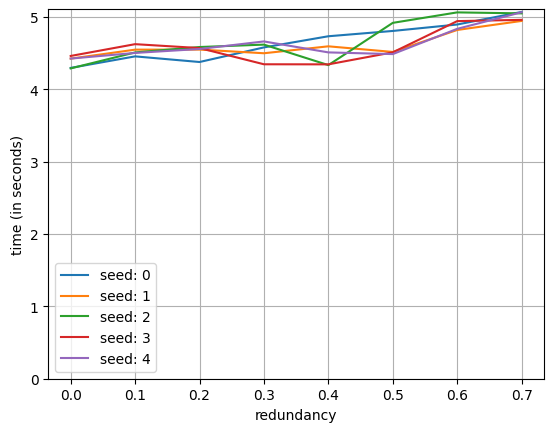

In [16]:
# Plot trie lookup durations

ax = plt.subplot()

for seed in seeds:
    seed_lookup_durations = []

    for redundancy in redundancies:

        relevant_experiments = [
            experiment
            for experiment in vr_experiments
            if experiment["params"]["cache_size"] > 0
            and experiment["params"]["redundancy"] == redundancy
            and experiment["params"]["seed"] == seed
        ]

        assert len(relevant_experiments) == 1

        seed_lookup_durations.append(relevant_experiments[0]["simulate_using_cache"]["trie_lookup_duration"])

    ax.plot(redundancies, seed_lookup_durations)

ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Trie lookup duration:")
plt.legend([f"seed: {seed}" for seed in seeds])
plt.grid()
plt.show()

Net simulation duration without trie lookup, averaged across seeds:


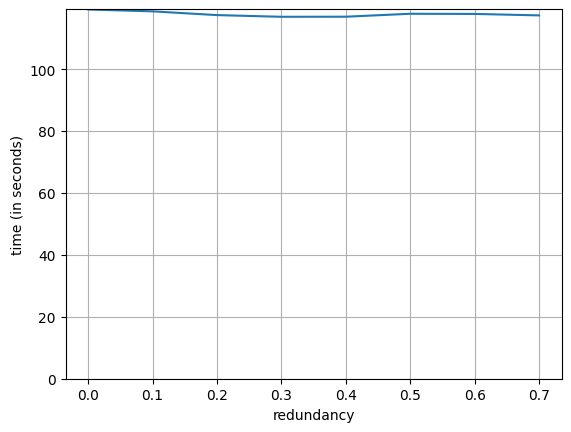

In [40]:
# Create a line chart with simulation vs. preparation time of 
# caching enabled.

simulation_durations = []

for redundancy in redundancies:

    relevant_experiments = [
        experiment
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["redundancy"] == redundancy
    ]

    sel_simulation_durations = [
        experiment["simulate_using_cache"]["duration"] - experiment["simulate_using_cache"]["trie_lookup_duration"]
        for experiment in relevant_experiments
    ]

    simulation_durations.append(mean(sel_simulation_durations))


ax = plt.subplot()
ax.plot(redundancies, simulation_durations)
ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Net simulation duration without trie lookup, averaged across seeds:")
plt.grid()
plt.show()

Net simulation duration without trie lookup:


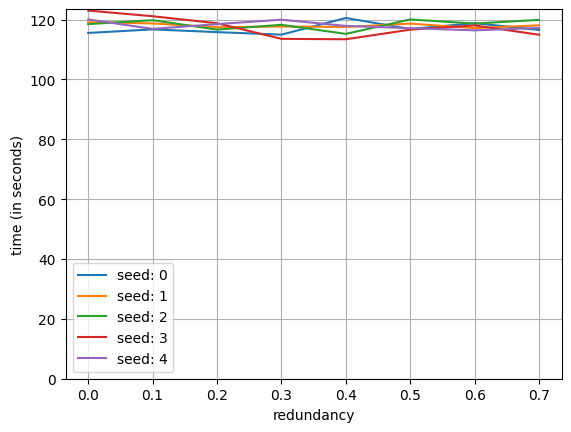

In [18]:
# Create a line chart with net simulation time per seed

ax = plt.subplot()

for seed in seeds:
    seed_simulation_durations = []

    for redundancy in redundancies:
        relevant_experiments = [
            experiment
            for experiment in vr_experiments
            if experiment["params"]["cache_size"] > 0
            and experiment["params"]["seed"] == seed
            and experiment["params"]["redundancy"] == redundancy
        ]

        sel_simulation_durations = [
            experiment["simulate_using_cache"]["duration"] - experiment["simulate_using_cache"]["trie_lookup_duration"]
            for experiment in relevant_experiments
        ]

        assert len(sel_simulation_durations) == 1, "Too many results per seed"

        seed_simulation_durations.append(sel_simulation_durations[0])

    ax.plot(redundancies, seed_simulation_durations)

ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Net simulation duration without trie lookup:")
plt.legend([f"seed: {seed}" for seed in seeds])
plt.grid()
plt.show()

Time distribution when caching is enabled:


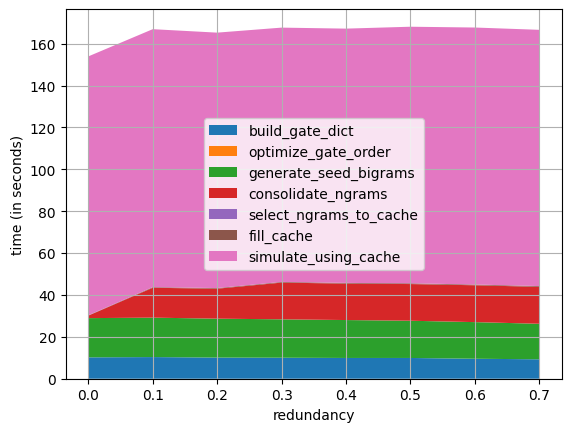

In [19]:
# Create a stack chart of the durations of different algorithm steps
# for all runs where cache size = 100.

build_gate_dict_durations = []
optimize_gate_order_durations = []
generate_seed_bigrams_durations = []
consolidate_ngrams_durations = []
select_ngrams_to_cache_durations = []
fill_cache_durations = []
simulate_using_cache_durations = []

for redundancy in redundancies:

    relevant_experiments = [
        experiment
        for experiment in vr_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["redundancy"] == redundancy
    ]

    build_gate_dict_durations.append(
        mean(
            [
                experiment["build_gate_frequency_dict"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    optimize_gate_order_durations.append(
        mean(
            [
                experiment["optimize_gate_order"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    generate_seed_bigrams_durations.append(
        mean(
            [
                experiment["generate_seed_bigrams"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    consolidate_ngrams_durations.append(
        mean(
            [
                experiment["consolidate_ngrams"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    select_ngrams_to_cache_durations.append(
        mean(
            [
                experiment["select_ngrams_to_cache"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    fill_cache_durations.append(
        mean(
            [
                experiment["fill_cache"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    simulate_using_cache_durations.append(
        mean(
            [
                experiment["simulate_using_cache"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )

x = redundancies
y = np.vstack(
    [
        build_gate_dict_durations,
        optimize_gate_order_durations,
        generate_seed_bigrams_durations,
        consolidate_ngrams_durations,
        select_ngrams_to_cache_durations,
        fill_cache_durations,
        simulate_using_cache_durations,
    ],
)

fig, ax = plt.subplots()

ax.stackplot(x, y)
ax.set_xlabel("redundancy")
ax.set_ylabel("time (in seconds)")

plt.legend(
    [
        "build_gate_dict",
        "optimize_gate_order",
        "generate_seed_bigrams",
        "consolidate_ngrams",
        "select_ngrams_to_cache",
        "fill_cache",
        "simulate_using_cache",
    ]
)
plt.grid()

printb("Time distribution when caching is enabled:")
plt.show()

Distribution of the length of ngrams added to the cache:


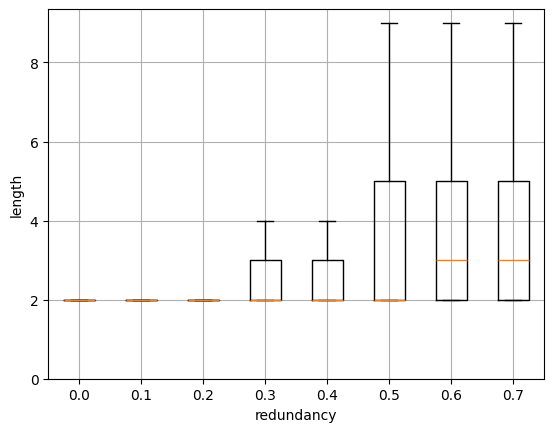

In [20]:
# Create box plots for sequence lengths of cached ngrams
# at different redundancy levels.

sequence_lengths = []

for redundancy in redundancies:

    relevant_experiments = [
        experiment for experiment in vr_experiments if 
        experiment["params"]["cache_size"] > 0 and experiment["params"]["redundancy"] == redundancy
    ]

    relevant_sequence_lengths = []
    for experiment in relevant_experiments:
        relevant_sequence_lengths.extend(experiment["fill_cache"]["ngram_lengths"])


    sequence_lengths.append(relevant_sequence_lengths)

fig, ax = plt.subplots()

ax.boxplot(sequence_lengths, showfliers=False)
ax.set_xlabel("redundancy")
ax.set_ylabel("length")
ax.set_ylim(0)

plt.xticks([i + 1 for i in range(len(redundancies))], redundancies)

printb("Distribution of the length of ngrams added to the cache:")

plt.grid()
plt.show()



Distribution of the frequency of each cached ngram in the population:


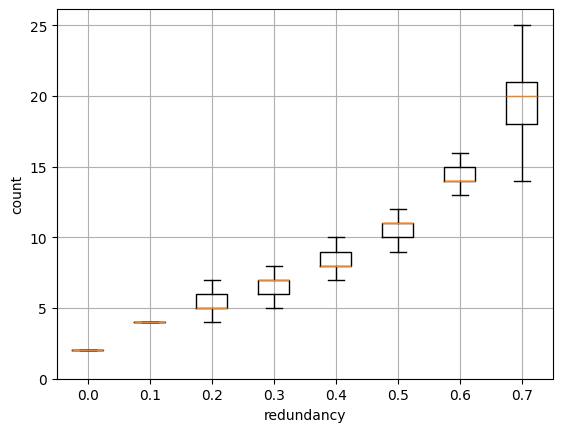

In [21]:
# Create box plots for frequency of cached ngrams at different redundancy levels.

frequencies = []

for redundancy in redundancies:

    relevant_experiments = [
        experiment for experiment in vr_experiments if 
        experiment["params"]["cache_size"] > 0 and experiment["params"]["redundancy"] == redundancy
    ]

    relevant_frequencies = []
    for experiment in relevant_experiments:
        relevant_frequencies.extend(experiment["fill_cache"]["ngram_frequencies"])


    frequencies.append(relevant_frequencies)

fig, ax = plt.subplots()

ax.boxplot(frequencies, showfliers=False)
ax.set_xlabel("redundancy")
ax.set_ylabel("count")
ax.set_ylim(0)

plt.xticks([i + 1 for i in range(len(redundancies))], redundancies)

printb("Distribution of the frequency of each cached ngram in the population:")

plt.grid()
plt.show()

Distribution of cached ngrams for redundancy 0.0


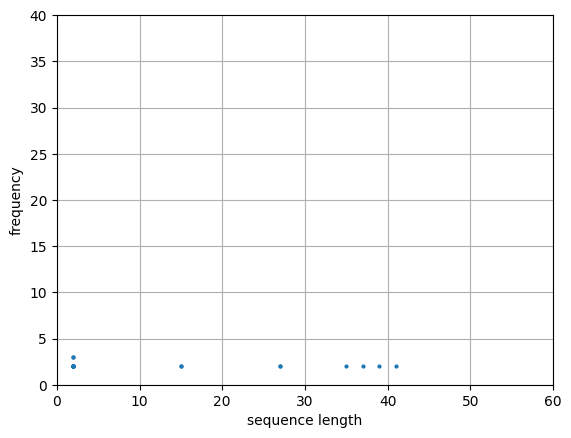

Distribution of cached ngrams for redundancy 0.1


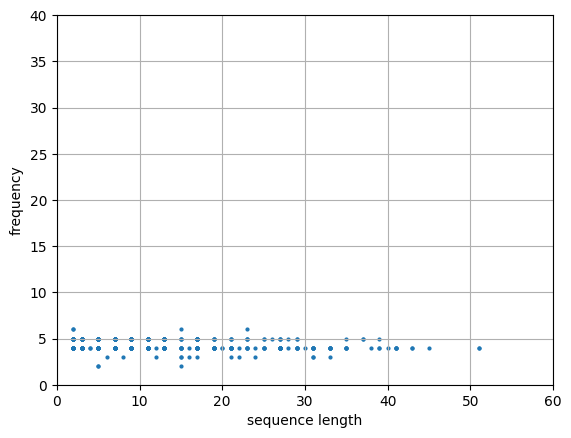

Distribution of cached ngrams for redundancy 0.2


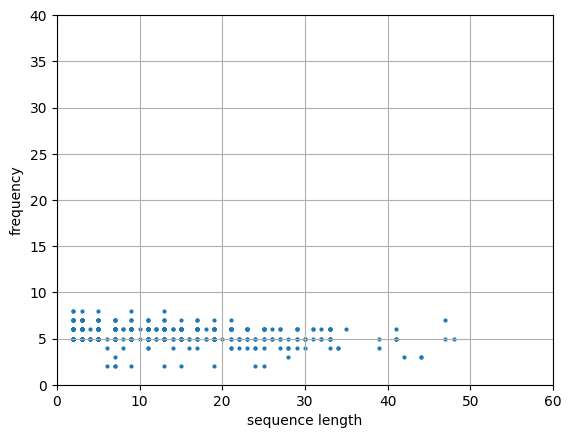

Distribution of cached ngrams for redundancy 0.3


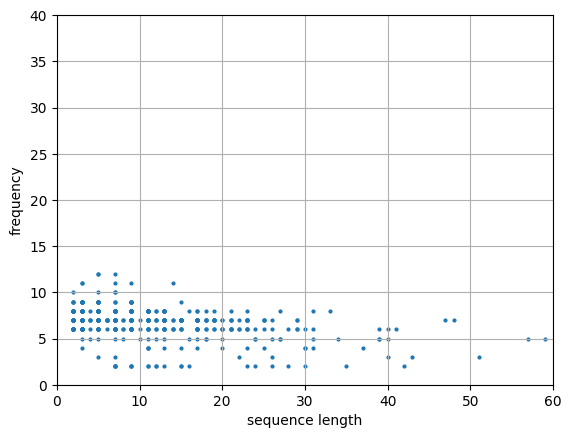

Distribution of cached ngrams for redundancy 0.4


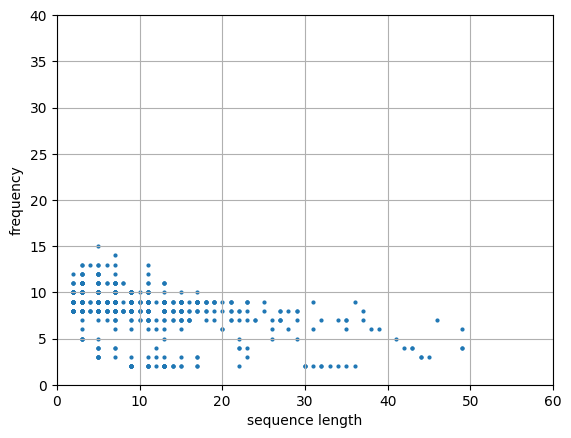

Distribution of cached ngrams for redundancy 0.5


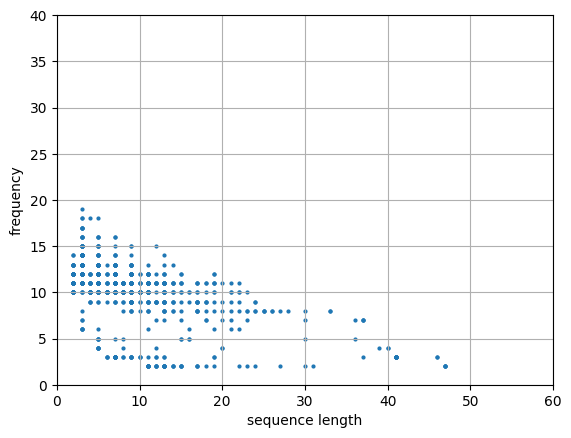

Distribution of cached ngrams for redundancy 0.6


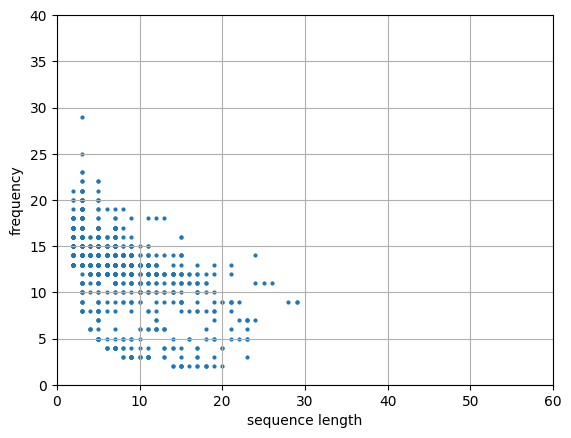

Distribution of cached ngrams for redundancy 0.7


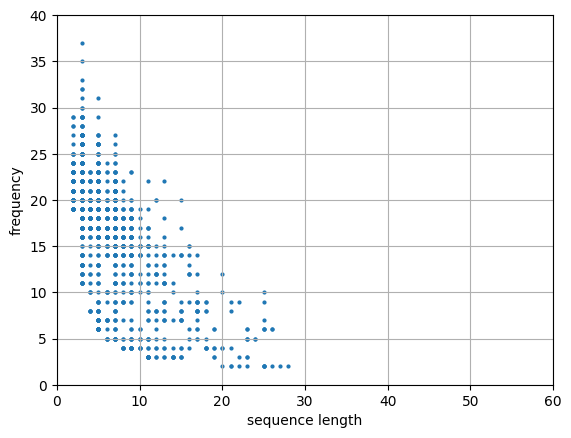

In [22]:

for redundancy in redundancies:
    relevant_experiments = [
        experiment for experiment in vr_experiments if 
        experiment["params"]["cache_size"] > 0 and experiment["params"]["redundancy"] == redundancy
    ]

    frequencies = []
    for experiment in relevant_experiments:
        frequencies.extend(experiment["fill_cache"]["ngram_frequencies"])

    sequence_lengths = []
    for experiment in relevant_experiments:
        sequence_lengths.extend(experiment["fill_cache"]["ngram_lengths"])

    fig, ax = plt.subplots()

    ax.scatter(x=sequence_lengths, y=frequencies, s=4)
    ax.set_xlabel("sequence length")
    ax.set_ylabel("frequency")
    ax.set_ylim([0, 40])
    ax.set_xlim([0, 60])

    printb(f"Distribution of cached ngrams for redundancy {redundancy}")

    plt.grid()
    plt.show()

## RQ2.1: How does the amount of qubits in the population influence simulation speed?

In [23]:
# Filter out and format experiment results with the varying_qubits tag

vq_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "varying_qubits"]
print(f"Total amount of varying_qubits experiments: {len(vq_experiments)}")

Total amount of varying_qubits experiments: 60


In [24]:
qubit_nums = [experiment["params"]["qubit_num"] for experiment in vq_experiments]
qubit_nums = list(set(qubit_nums))
qubit_nums.sort()

print("Qubit counts:", qubit_nums)

Qubit counts: [3, 4, 5, 6, 7, 8]


Total simulation time, averaged across seeds:


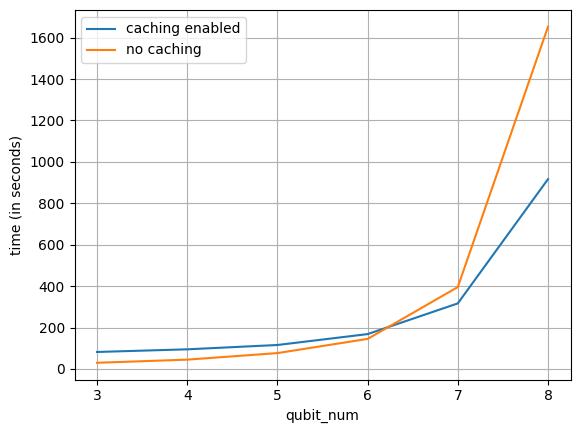

In [25]:
# Create a line chart with simulation time on y and qubit count 
# on x. One line for the runs with caching enabled, one line for the 
# runs with cache size 0.

durations_no_cache = []
durations_with_cache = []

for qubit_num in qubit_nums:

    sel_durations_no_cache = [
        experiment["total_duration"]
        for experiment in vq_experiments
        if experiment["params"]["cache_size"] == 0
        and experiment["params"]["qubit_num"] == qubit_num
    ]
    durations_no_cache.append(mean(sel_durations_no_cache))

    sel_durations_with_cache = [
        experiment["total_duration"]
        for experiment in vq_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["qubit_num"] == qubit_num
    ]
    durations_with_cache.append(mean(sel_durations_with_cache))

ax = plt.subplot()
ax.plot(qubit_nums, durations_with_cache)
ax.plot(qubit_nums, durations_no_cache)
ax.set_xlabel("qubit_num")
ax.set_ylabel("time (in seconds)")

printb("Total simulation time, averaged across seeds:")
plt.legend(["caching enabled", "no caching"])
plt.grid()
plt.show()


Components of total simulation time, averaged across seeds:


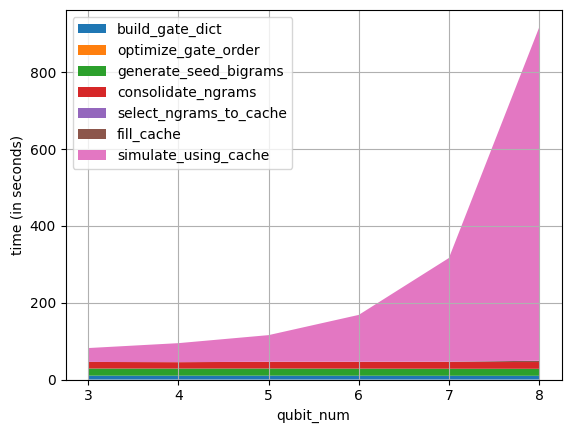

In [26]:
# Create a stack chart of the durations of different algorithm steps
# for all runs where cache size = 100.

build_gate_dict_durations = []
optimize_gate_order_durations = []
generate_seed_bigrams_durations = []
consolidate_ngrams_durations = []
select_ngrams_to_cache_durations = []
fill_cache_durations = []
simulate_using_cache_durations = []

for qubit_num in qubit_nums:

    relevant_experiments = [
        experiment
        for experiment in vq_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["qubit_num"] == qubit_num
    ]

    build_gate_dict_durations.append(
        mean(
            [
                experiment["build_gate_frequency_dict"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    optimize_gate_order_durations.append(
        mean(
            [
                experiment["optimize_gate_order"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    generate_seed_bigrams_durations.append(
        mean(
            [
                experiment["generate_seed_bigrams"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    consolidate_ngrams_durations.append(
        mean(
            [
                experiment["consolidate_ngrams"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    select_ngrams_to_cache_durations.append(
        mean(
            [
                experiment["select_ngrams_to_cache"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    fill_cache_durations.append(
        mean(
            [
                experiment["fill_cache"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )
    simulate_using_cache_durations.append(
        mean(
            [
                experiment["simulate_using_cache"]["duration"]
                for experiment in relevant_experiments
            ]
        )
    )

x = qubit_nums
y = np.vstack(
    [
        build_gate_dict_durations,
        optimize_gate_order_durations,
        generate_seed_bigrams_durations,
        consolidate_ngrams_durations,
        select_ngrams_to_cache_durations,
        fill_cache_durations,
        simulate_using_cache_durations,
    ],
)

fig, ax = plt.subplots()

ax.stackplot(x, y)
ax.set_xlabel("qubit_num")
ax.set_ylabel("time (in seconds)")

printb("Components of total simulation time, averaged across seeds:")

plt.legend(
    [
        "build_gate_dict",
        "optimize_gate_order",
        "generate_seed_bigrams",
        "consolidate_ngrams",
        "select_ngrams_to_cache",
        "fill_cache",
        "simulate_using_cache",
    ]
)
plt.grid()

plt.show()

## RQ2.2: How does the amount of gates per circuit influence simulation speed?

In [27]:
# Filter out and format experiment results with the varying_gates tag

vg_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "varying_gates"]
print(f"Total amount of varying_gates experiments: {len(vg_experiments)}")

Total amount of varying_gates experiments: 100


In [28]:
gate_counts = [experiment["params"]["gate_count"] for experiment in vg_experiments]
gate_counts = list(set(gate_counts))
gate_counts.sort()

print("Gate counts:", gate_counts)

Gate counts: [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]


Total simulation time, averaged across seeds:


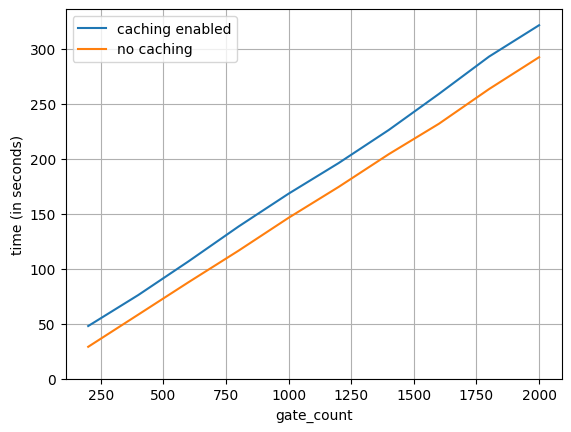

In [29]:
# Create a line chart with simulation time on y and gate count per circuit 
# on x. One line for the runs with caching enabled, one line for the 
# runs with cache size 0.

durations_no_cache = []
durations_with_cache = []

for gate_count in gate_counts:

    sel_durations_no_cache = [
        experiment["total_duration"]
        for experiment in vg_experiments
        if experiment["params"]["cache_size"] == 0
        and experiment["params"]["gate_count"] == gate_count
    ]
    durations_no_cache.append(mean(sel_durations_no_cache))

    sel_durations_with_cache = [
        experiment["total_duration"]
        for experiment in vg_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["gate_count"] == gate_count
    ]
    durations_with_cache.append(mean(sel_durations_with_cache))

ax = plt.subplot()
ax.plot(gate_counts, durations_with_cache)
ax.plot(gate_counts, durations_no_cache)
ax.set_xlabel("gate_count")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Total simulation time, averaged across seeds:")

plt.legend(["caching enabled", "no caching"])
plt.grid()
plt.show()


Net simulation time, averaged across seeds:


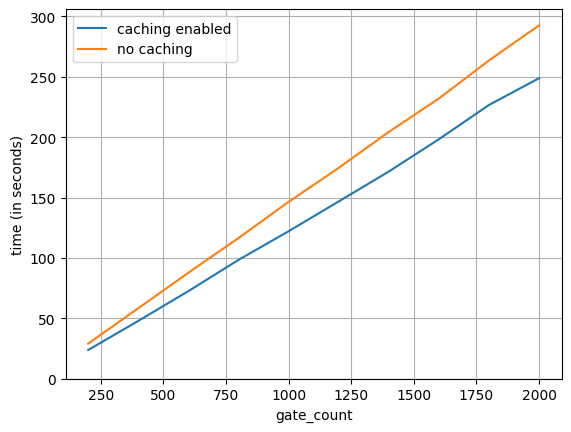

In [30]:
# Create a line chart with net simulation time on y and gate count per circuit 
# on x. One line for the runs with caching enabled, one line for the 
# runs with cache size 0.

durations_no_cache = []
durations_with_cache = []

for gate_count in gate_counts:

    sel_durations_no_cache = [
        experiment["simulate_without_cache"]["duration"]
        for experiment in vg_experiments
        if experiment["params"]["cache_size"] == 0
        and experiment["params"]["gate_count"] == gate_count
    ]
    durations_no_cache.append(mean(sel_durations_no_cache))

    sel_durations_with_cache = [
        experiment["simulate_using_cache"]["duration"]
        for experiment in vg_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["gate_count"] == gate_count
    ]
    durations_with_cache.append(mean(sel_durations_with_cache))

ax = plt.subplot()
ax.plot(gate_counts, durations_with_cache)
ax.plot(gate_counts, durations_no_cache)
ax.set_xlabel("gate_count")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)


printb("Net simulation time, averaged across seeds:")
plt.legend(["caching enabled", "no caching"])
plt.grid()
plt.show()


## RQ3.1: How does the amount of reordering steps influence simulation speed?

In [31]:
# Filter out and format experiment results with the reordering_varying_steps tag

rvs_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "reordering_varying_steps"]
print(f"Total amount of reordering_varying_steps experiments: {len(rvs_experiments)}")

Total amount of reordering_varying_steps experiments: 55


In [32]:
reordering_steps = [experiment["params"]["reordering_steps"] for experiment in rvs_experiments]
reordering_steps = list(set(reordering_steps))
reordering_steps.sort()

print("Reordering steps:", reordering_steps)

Reordering steps: [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]


Total simulation time, averaged across seeds:


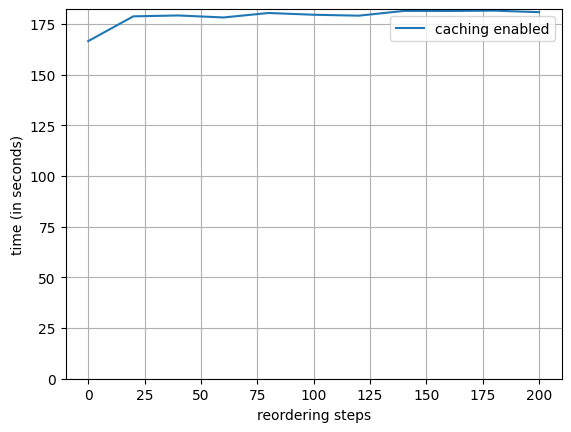

In [33]:
# Create a line chart with simulation time on y and reordering step count 
# on x. 

durations_with_cache = []

for reordering_step in reordering_steps:

    sel_durations_with_cache = [
        experiment["total_duration"]
        for experiment in rvs_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["reordering_steps"] == reordering_step
    ]
    
    durations_with_cache.append(mean(sel_durations_with_cache))

ax = plt.subplot()
ax.plot(reordering_steps, durations_with_cache)
ax.set_xlabel("reordering steps")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)


printb("Total simulation time, averaged across seeds:")
plt.legend(["caching enabled"])
plt.grid()
plt.show()


Net simulation time, averaged across seeds:


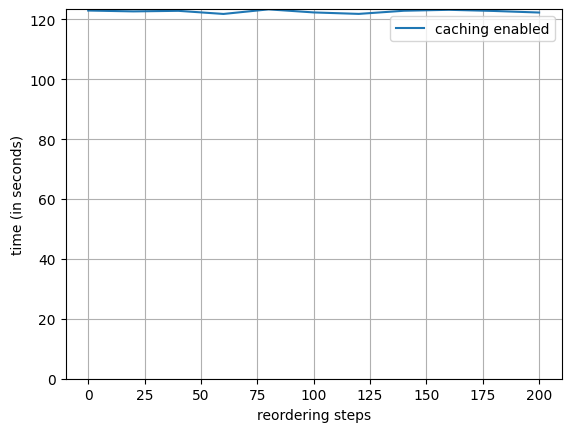

In [34]:
# Create a line chart with simulation time on y and reordering step count 
# on x. 

durations_with_cache = []

for reordering_step in reordering_steps:

    sel_durations_with_cache = [
        experiment["simulate_using_cache"]["duration"]
        for experiment in rvs_experiments
        if experiment["params"]["cache_size"] > 0
        and experiment["params"]["reordering_steps"] == reordering_step
    ]
    
    durations_with_cache.append(mean(sel_durations_with_cache))

ax = plt.subplot()
ax.plot(reordering_steps, durations_with_cache)
ax.set_xlabel("reordering steps")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)


printb("Net simulation time, averaged across seeds:")
plt.legend(["caching enabled"])
plt.grid()
plt.show()


Net simulation time, per seed:


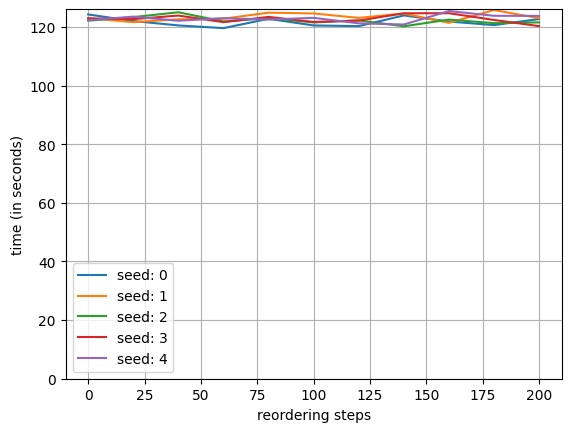

In [35]:
# Create a line chart with simulation time on y and reordering step count 
# on x. 

ax = plt.subplot()
for seed in seeds:
    seed_durations = []

    for reordering_step in reordering_steps:

        sel_durations_with_cache = [
            experiment["simulate_using_cache"]["duration"]
            for experiment in rvs_experiments
            if experiment["params"]["cache_size"] > 0
            and experiment["params"]["seed"] == seed
            and experiment["params"]["reordering_steps"] == reordering_step
        ]

        assert len(sel_durations_with_cache) == 1
        
        seed_durations.append(sel_durations_with_cache[0])

    ax.plot(reordering_steps, seed_durations)

ax.set_xlabel("reordering steps")
ax.set_ylabel("time (in seconds)")
ax.set_ylim(0)

printb("Net simulation time, per seed:")
plt.legend([f"seed: {seed}" for seed in seeds])
plt.grid()
plt.show()


## RQ3.2: How does the amount of reordering steps influence the lengths and frequencies of the cached gate sequences across varying redundancy levels?

In [36]:
# Filter out and format experiment results with the reordering_varying_redundancy tag

rvr_experiments = [experiment for experiment in experiments if experiment["params"]["tag"] == "reordering_varying_redundancy"]
print(f"Total amount of reordering_varying_redundancy experiments: {len(rvr_experiments)}")

Total amount of reordering_varying_redundancy experiments: 40


In [37]:
redundancies = [experiment["params"]["redundancy"] for experiment in rvr_experiments]
redundancies = list(set(redundancies))
redundancies.sort()

print("Redundancies:", redundancies)

Redundancies: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


In [38]:
# TBD: How to best visualize change in redundancy depending on starting redundancy


